In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
def showPassengersNumberByDate(data):
    plt.figure(figsize=(15,15))
    sns.lineplot(data,x="dateTime",y="passengersNumber",hue="line")
    plt.show()
    palette = sns.color_palette("bright")

# Chargement des données

In [4]:
data = pd.read_csv("data_estia_bihar_passagers.csv",parse_dates=['dateTime'])

In [3]:
# data.sort_values(["line","dateTime"],ascending=True).head(50)

In [5]:
data = data.sort_values("dateTime")

In [6]:
data.shape

(36901, 4)

In [7]:
data.columns

Index(['dateTime', 'passengersNumber', 'line', 'lineType'], dtype='object')

# Nettoyage

On verifie qu'il n'existe pas des lignes pour lequelles à une date donnée on a deux occurences d'un meme bus

In [759]:
data.duplicated(["dateTime","line","lineType"]).sum()

58

Il y'a 58 lignes ayant deux occurences pour le même bus

In [762]:
data[data.duplicated(["dateTime","line","lineType"],keep=False)].head(15)

dateTime  passengersNumber line lineType dateTimeStr    dateDay  \
17998 2019-08-24            1671.0   31    daily  2019-08-24   Saturday   
17866 2019-08-24            1673.0   31    daily  2019-08-24   Saturday   
20077 2019-08-24            2971.0   33    daily  2019-08-24   Saturday   
20089 2019-08-24            2972.0   33    daily  2019-08-24   Saturday   
61    2019-08-25            4742.0    5    daily  2019-08-25     Sunday   
62    2019-08-25            4741.0    5    daily  2019-08-25     Sunday   
17907 2019-08-27            2273.0   31    daily  2019-08-27    Tuesday   
31273 2019-08-27              68.0  TB6    daily  2019-08-27    Tuesday   
4345  2019-08-27            3216.0   14    daily  2019-08-27    Tuesday   
31235 2019-08-27              66.0  TB6    daily  2019-08-27    Tuesday   
17999 2019-08-27            2287.0   31    daily  2019-08-27    Tuesday   
4237  2019-08-27            3124.0   14    daily  2019-08-27    Tuesday   
5389  2019-08-28            2874.0   16    daily  2019-08-28  Wednesday   
5447  2019-08-28            2860.0   16    daily  2019-08-28  Wednesday   
13764 2019-08-29            5217.0   26    daily  2019-08-29   Thursday   

       is_weekend  month  
17998        True      8  
17866        True      8  
20077        True      8  
20089        True      8  
61           True      8  
62           True      8  
17907       False      8  
31273       False      8  
4345        False      8  
31235       False      8  
17999       False      8  
4237        False      8  
5389        False      8  
5447        False      8  
13764       False      8

In [765]:
data.drop_duplicates(["dateTime","line","lineType"],inplace=True)
data.duplicated(["dateTime","line","lineType"]).sum()

0

# Obervation des données

In [4]:
data.dtypes

dateTime            datetime64[ns]
passengersNumber           float64
line                        object
lineType                    object
dtype: object

In [5]:
data.head()

dateTime  passengersNumber line lineType
0 2019-05-01            4172.0    5    daily
1 2019-04-06            7330.0    5    daily
2 2019-04-05           10426.0    5    daily
3 2019-04-17            9134.0    5    daily
4 2019-04-21            3608.0    5    daily

**On corrige le format de la date**

In [6]:
data["dateTimeStr"] = data["dateTime"].astype(str)

In [7]:
data["dateDay"] = data.dateTime.dt.day_name()

In [541]:
data["is_weekend"] = data.dateTime.dt.dayofweek > 4

In [632]:
data["month"] = data.dateTime.dt.month

In [8]:
data.shape

(36901, 6)

Il y'a 36901 lignes

In [9]:
data_describe = data.describe()
data_describe

passengersNumber
count      36901.000000
mean        5585.431316
std         4032.138753
min            0.000000
25%          995.000000
50%         6735.000000
75%         9361.000000
max        15948.000000

- Les affluences varient entre 0 et 15948
- La mediane est 4032.138753

In [10]:
passengersNumber_median = data_describe.loc["50%"][0]

In [11]:
data.line.nunique()

39

Il y'a 39 lignes au total

In [10]:
data[data.lineType == "night"].line.unique()

array(['B6', 'B8', 'B9', 'B2', 'B1', 'B3', 'B4', 'B10'], dtype=object)

In [12]:
data.groupby("lineType").nunique()

dateTime  passengersNumber  line  dateTimeStr  dateDay
lineType                                                        
daily         1159              5272    31         1159        7
night          635               474     8          635        7

Il y'a 31 lignes de jour et 8 lignes nuits.

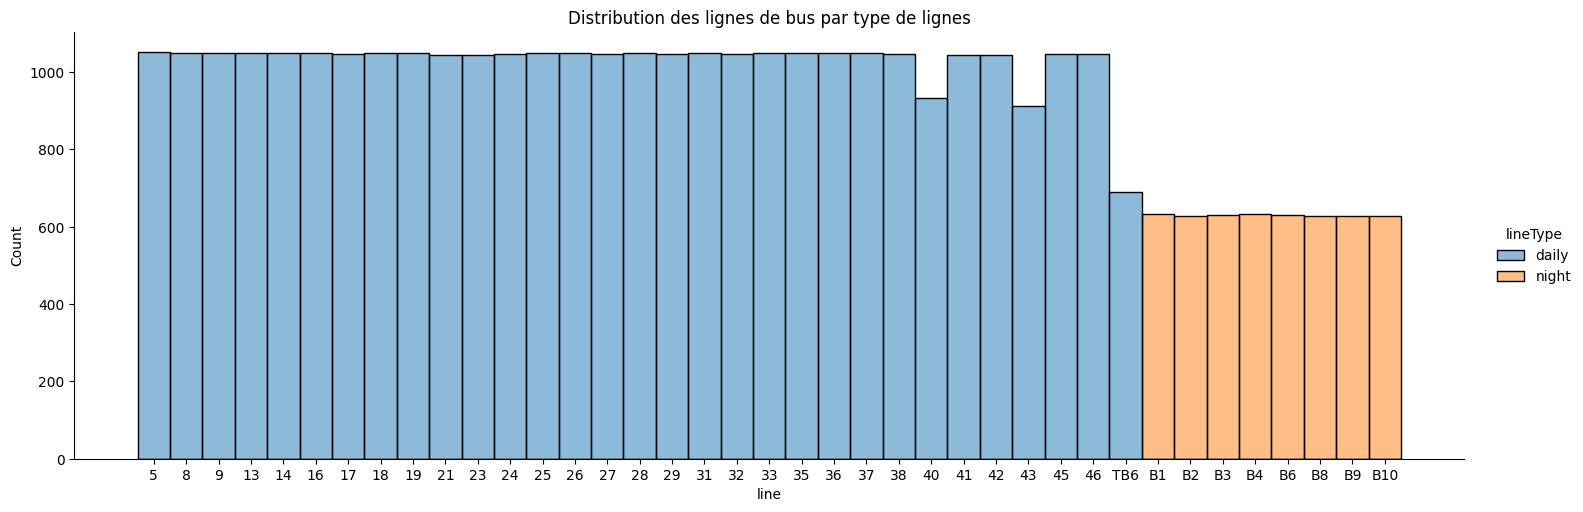

In [13]:
sns.displot(data,x="line",hue="lineType",bins=5,aspect=3)
plt.title("Distribution des lignes de bus par type de lignes")
plt.show()

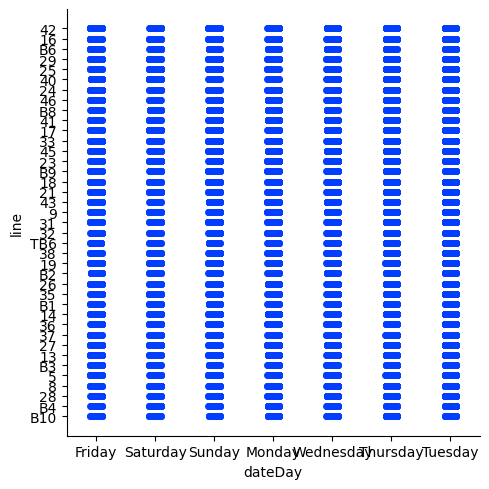

In [982]:
sns.catplot(data,x="dateDay",y="line",hue="dateDay")
plt.show()

Tous les bus ne roule pas tous les jours pendant tous les mois | Attribuer une zone a chaque bus

**A ce stade on peut faire de l'exploration des données**

D'après la distribution, les lignes de jour ne sont pas les lignes de nuit.

# Analyse exploratoire

## Visualisation des données

In [14]:
data_line_5 = data[data.line=="5"]
data_line_night = data[data.lineType=="night"]

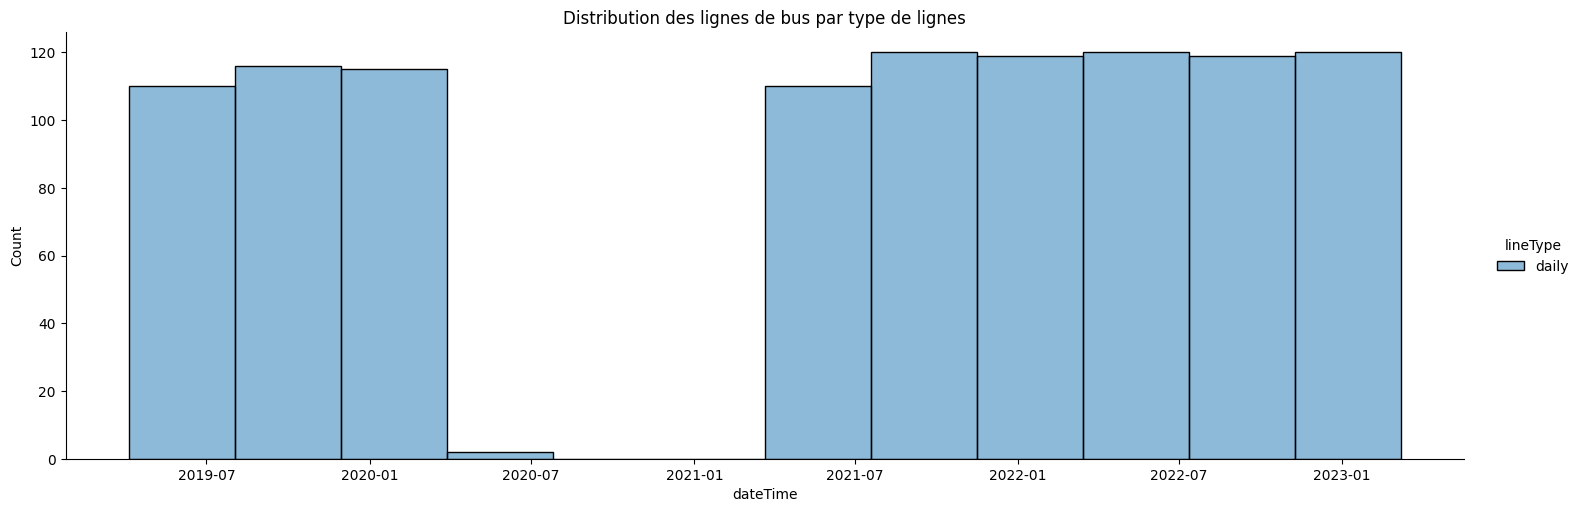

In [15]:
sns.displot(data_line_5,x="dateTime",hue="lineType",aspect=3)
plt.title("Distribution des lignes de bus par type de lignes")
plt.show()

In [ ]:
Le nombre d'entrée par année | Le nombre de données par année | Le de bus ayant circulé par années | Reduction des données en semaine

# Fonctions de visualisation

In [229]:
def showPassengersNumberByDate(data,figsize=(15,15),no_line=False,use_day=False,use_date_str=False):
    #palette = sns.color_palette("bright")
    describe = data.describe()
    max_ = describe.loc["max"][0]
    min_ = describe.loc["min"][0]
    quantile_25 = describe.loc["25%"][0]
    quantile_50 = describe.loc["50%"][0]
    quantile_75 = describe.loc["75%"][0]
    ab_min = data.passengersNumber.quantile(0.06)
    ab_max = data.passengersNumber.quantile(1) 
    sns.set_palette("bright") 
    plt.figure(figsize=figsize)   
    if use_day:
        sns.lineplot(data,x="dateTime",y="passengersNumber",hue="line",style="dateDay")
    elif use_date_str:
        sns.lineplot(data,x="dateTimeStr",y="passengersNumber",hue="line")
    else:
        sns.lineplot(data,x="dateTime",y="passengersNumber",hue="line")
    
    if not no_line:
        plt.axhline(y=max_,color='violet')
        plt.axhline(y=min_,color='maroon')
        plt.axhline(y=quantile_25,color='purple')
        plt.axhline(y=quantile_50,color='yellow')
        plt.axhline(y=quantile_75,color='orange')
        plt.axhline(y=ab_min,color='red')
        plt.axhline(y=ab_max,color='green')  
    plt.xticks(rotation=90)
    plt.show()

In [1185]:
def gh_m2(data,minq=0,maxq=1,use_day=False,title="",use_date_str=False):
    
    date_col = "dateTime"
    
    if use_date_str:
        date_col = "dateTimeStr"
    
    fig, axs = plt.subplots(nrows=5,ncols=2, figsize=(23, 15))
    fig.tight_layout()
    
    sns.boxplot(data,x="passengersNumber",ax=axs[0,0])
    sns.lineplot(data=data, x=date_col, y="passengersNumber",hue="month",ax=axs[0,1],estimator=None)
    
    sns.lineplot(data[(data.is_weekend==False)],x=date_col,y="passengersNumber",hue="line",ax=axs[1,0])  
    sns.lineplot(data[(data.is_weekend==True)],x=date_col,y="passengersNumber",hue="line",ax=axs[1,1])  
    
    axs[1,0].set_title("Jour ouvrable")
    axs[1,1].set_title("Weekend")
    
    sns.lineplot(data[(data.is_weekend==False)],x=date_col,y="passengersNumber",ax=axs[2,0],errorbar="se")
    sns.lineplot(data[(data.is_weekend==True)],x=date_col,y="passengersNumber",ax=axs[2,1],errorbar="se")
    
    sns.lineplot(data,x=date_col,y="passengersNumber",hue="line",ax=axs[3,0])      
    sns.lineplot(data=data, x=date_col, y="passengersNumber",hue="is_weekend",markers=True,ax=axs[3,1],estimator=None)
    
    sns.lineplot(data=data, x=date_col, y="passengersNumber",ax=axs[4,0],errorbar="se")
    sns.lineplot(data=data, x=date_col, y="passengersNumber",hue="is_weekend",markers=True,ax=axs[4,1])
    
    fig.suptitle(title)
    
    for tick in axs[1,0].get_xticklabels():
        tick.set_rotation(45)
    for tick in axs[1,1].get_xticklabels():
        tick.set_rotation(45)
    for tick in axs[2,0].get_xticklabels():
        tick.set_rotation(45)
    for tick in axs[2,1].get_xticklabels():
        tick.set_rotation(45)
    for tick in axs[4,0].get_xticklabels():
        tick.set_rotation(45)
    for tick in axs[4,1].get_xticklabels():
        tick.set_rotation(45)
        
    plt.subplots_adjust(top=0.9,wspace=0.2, hspace=0.3)
    plt.show()
    
    #f = sns.displot(data, x="dateTime", y="passengersNumber",cbar=True)
    #plt.xticks(rotation=90)



In [1335]:
def gh_m4(data,minq=0,maxq=1,use_day=False,title="",use_date_str=False):
    date_col = "dateTime"
    if use_date_str:
        date_col = "dateTimeStr"
    fig, axs = plt.subplots(nrows=6,ncols=2, figsize=(23, 20))
    fig.tight_layout(pad=5.0)
    sns.lineplot(data=data[(data.lineType=="daily")], x=date_col, y="passengersNumber",hue="month",ax=axs[0,0],estimator=None)
    sns.lineplot(data=data[(data.lineType=="daily")], x=date_col, y="passengersNumber",ax=axs[1,0])
    sns.lineplot(data=data[(data.lineType=="daily")],x=date_col,y="passengersNumber",hue="line",ax=axs[2,0])      
    sns.lineplot(data=data[(data.lineType=="daily")], x=date_col, y="passengersNumber",hue="is_weekend",ax=axs[3,0])
    sns.lineplot(data=data[(data.lineType=="daily")&(data.is_weekend==True)], x=date_col,hue="line",y="passengersNumber",ax=axs[4,0])
    sns.lineplot(data=data[(data.lineType=="daily")&(data.is_weekend==False)], x=date_col,hue="line",y="passengersNumber",ax=axs[5,0])
    axs[0,0].set_title("Bus de jour")
    axs[1,0].set_title("Jour ouvrable & Weekend")
    axs[3,0].set_title("Jour ouvrable")
    axs[4,0].set_title("Weekend")
    sns.lineplot(data=data[(data.lineType=="night")], x=date_col, y="passengersNumber",hue="month",ax=axs[0,1],estimator=None)
    sns.lineplot(data=data[(data.lineType=="night")], x=date_col, y="passengersNumber",ax=axs[1,1])
    sns.lineplot(data=data[(data.lineType=="night")],x=date_col,y="passengersNumber",hue="line",ax=axs[2,1])      
    sns.lineplot(data=data[(data.lineType=="night")], x=date_col, y="passengersNumber",hue="is_weekend",ax=axs[3,1])
    sns.lineplot(data=data[(data.lineType=="night")&(data.is_weekend==True)], x=date_col,hue="line",y="passengersNumber",ax=axs[4,1])
    sns.lineplot(data=data[(data.lineType=="night")&(data.is_weekend==False)], x=date_col,hue="line",y="passengersNumber",ax=axs[5,1])
    axs[0,1].set_title("Bus de nuit")
    axs[1,1].set_title("Jour ouvrable & Weekend")
    axs[3,1].set_title("Jour ouvrable")
    axs[4,1].set_title("Weekend")
    axs[0,0].get_legend().remove()
    axs[2,0].get_legend().remove()
    axs[3,0].get_legend().remove()
    axs[4,0].get_legend().remove()
    axs[5,0].get_legend().remove()
    fig.suptitle(title)
    for i in range(6):
        for j in range(2):
            for tick in axs[i,j].get_xticklabels():
                tick.set_rotation(20)
    plt.subplots_adjust(hspace=0.4)
    plt.show()

# Analyse 2019

In [767]:
data_2019 = data[(data.dateTime.dt.year==2019)]

In [508]:
zone_representant = ["5", "19", "8", "17", "36","TB6"]
zone_ouest = ["5", "16", "18", "25", "45"]
ferie_2019 = ["2019-04-19","2019-04-21","2019-04-22","2019-05-01","2019-08-15","2019-10-12","2019-11-01","2019-12-06","2019-12-25"] #!
fete_2019 = ["2019-12-22","2019-12-23","2019-12-24","2019-12-26","2019-12-28","2019-12-29","2019-12-30","2019-12-31"] #!
sport_2019 = ["2019-06-05","2019-06-12","2019-10-08","2019-10-20","2019-12-21"]
incident_2019 = []
event_2019 = ["2019-08-10","2019-08-11","2019-08-12","2019-08-13","2019-08-14","2019-08-15","2019-08-16","2019-08-17","2019-10-26","2019-09-14"]
social_2019 = ["2019-10-14","2019-10-15","2019-10-16"]
politique_2019 = ["2019-10-29"]
date_avoid = ferie_2019+sport_2019+event_2019+incident_2019+politique_2019+social_2019
normal_date = None

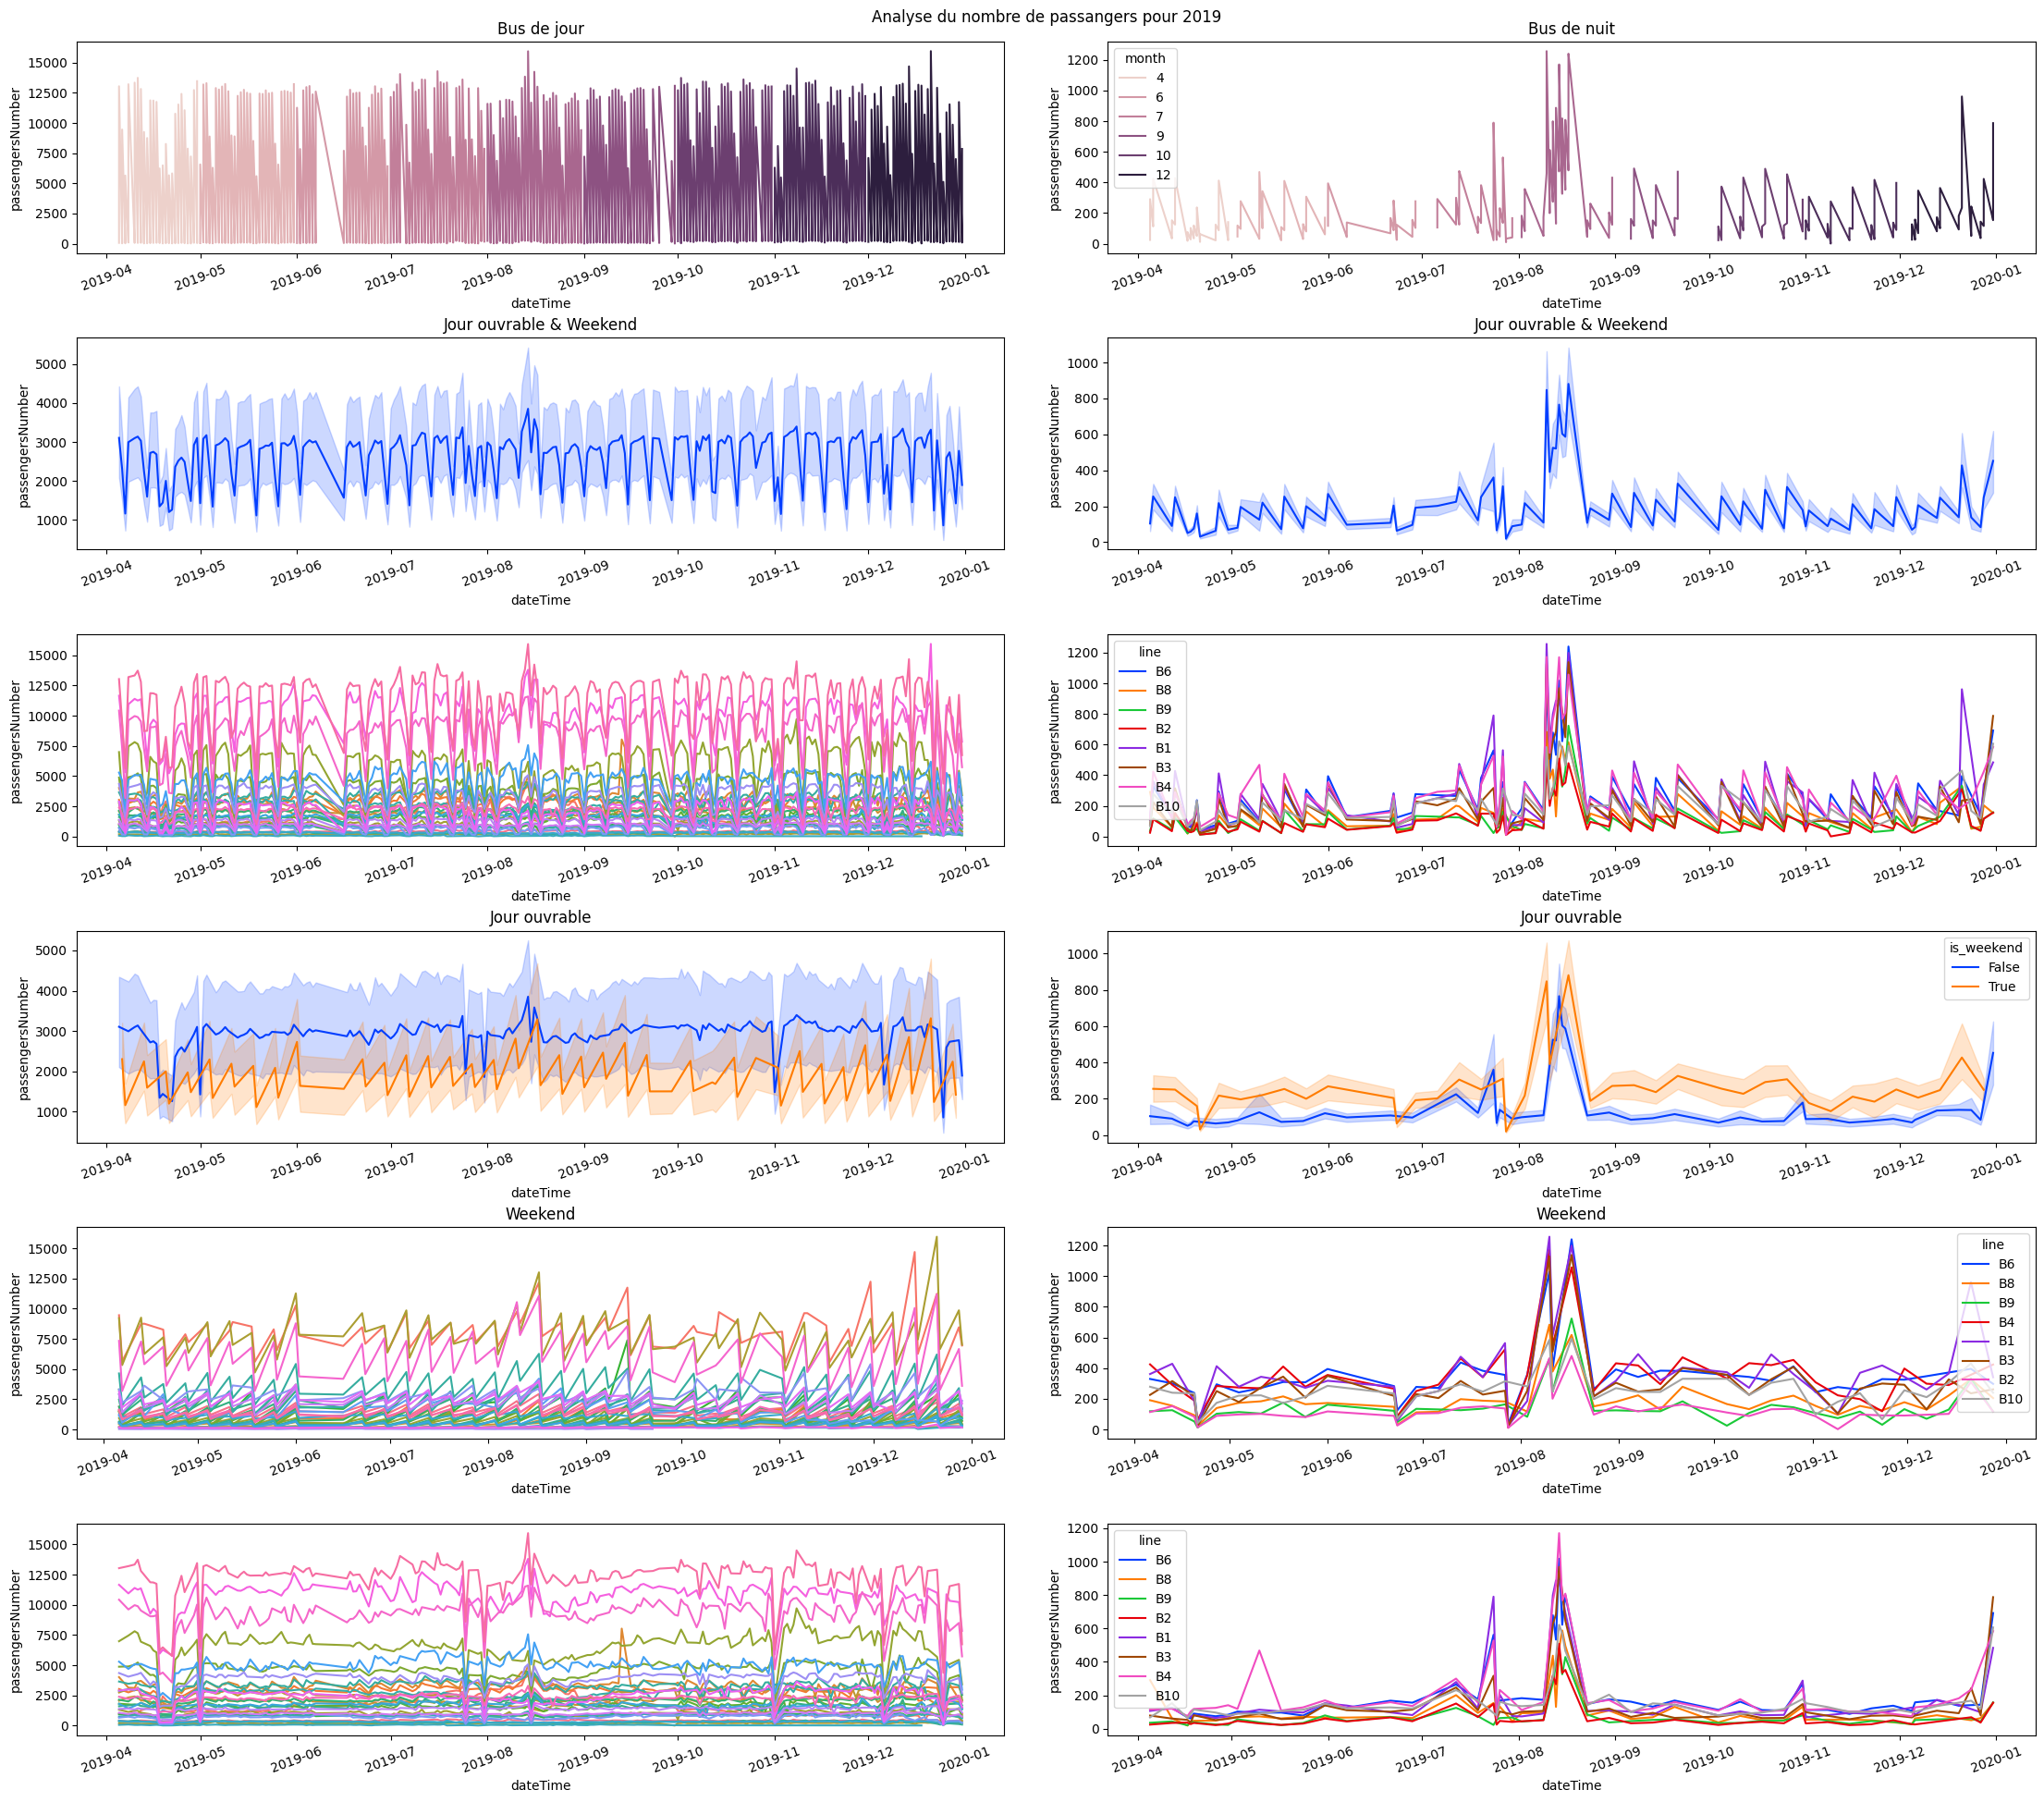

In [1337]:
gh_m4(data_2019,title=f"Analyse du nombre de passangers pour 2019",use_date_str=False)

# Analyse 2020

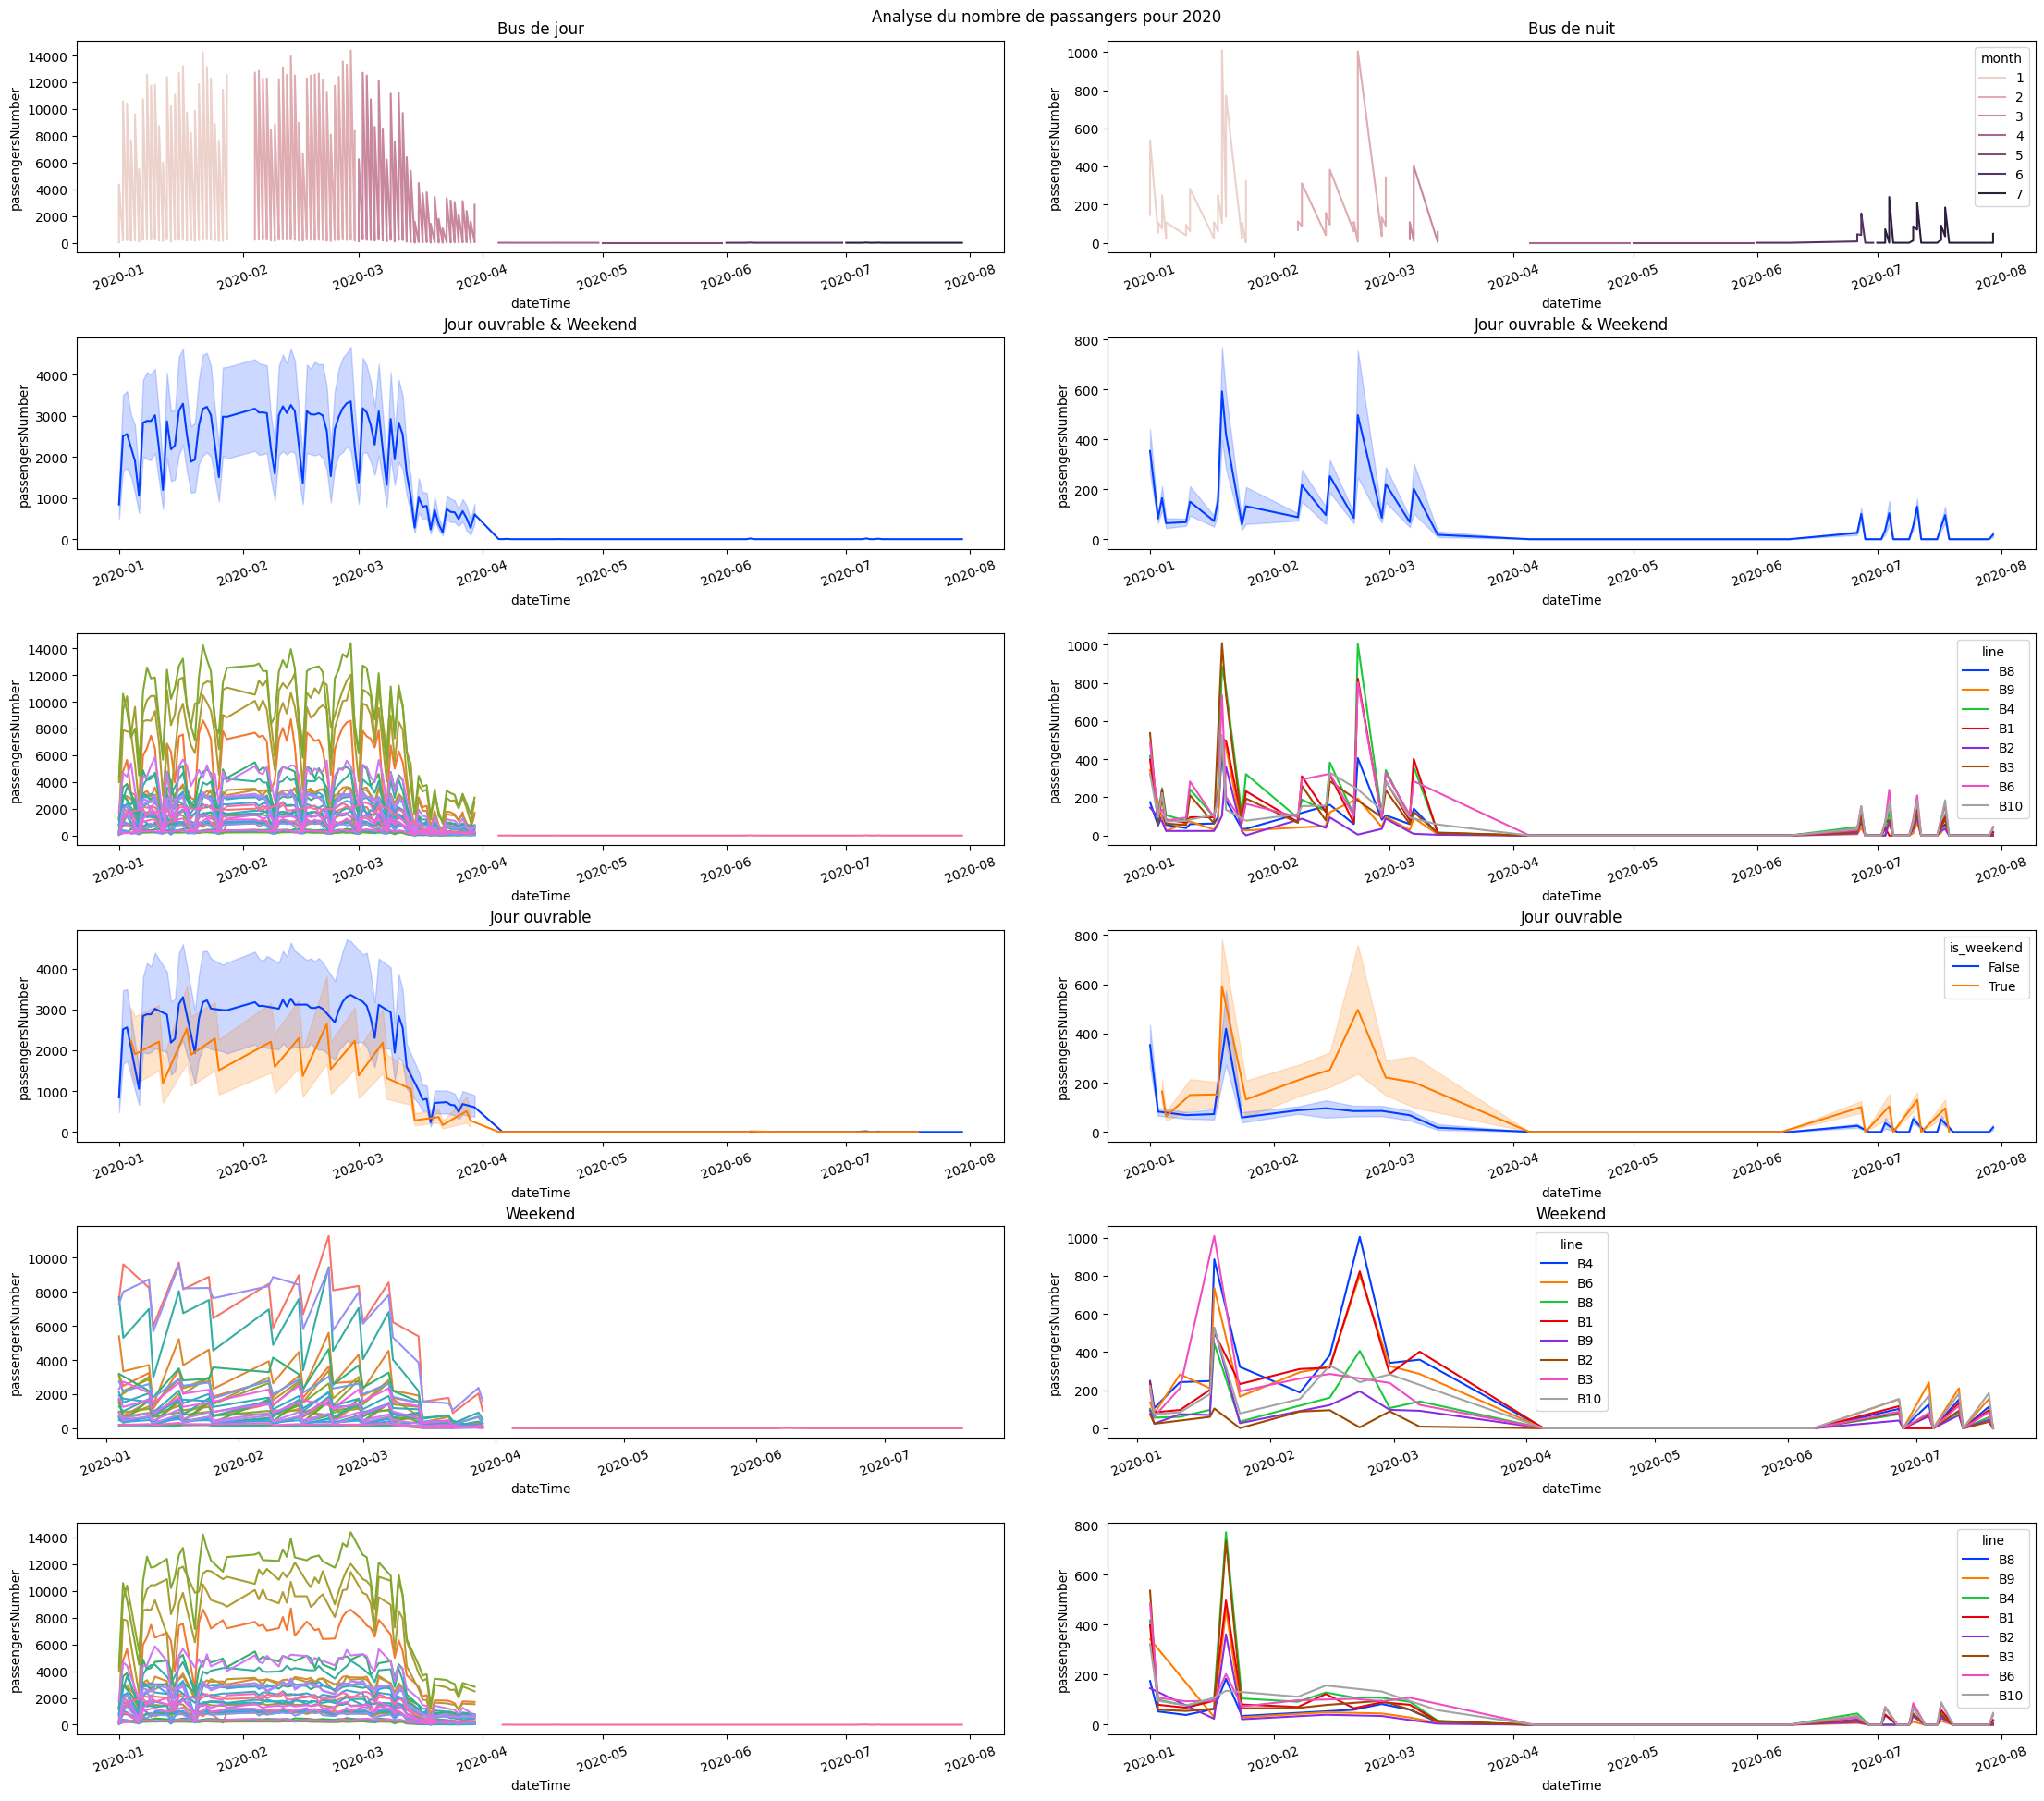

In [1338]:
gh_m4(data[(data.dateTime.dt.year==2020)],title=f"Analyse du nombre de passangers pour 2020",use_date_str=False)

# Analyse 2021

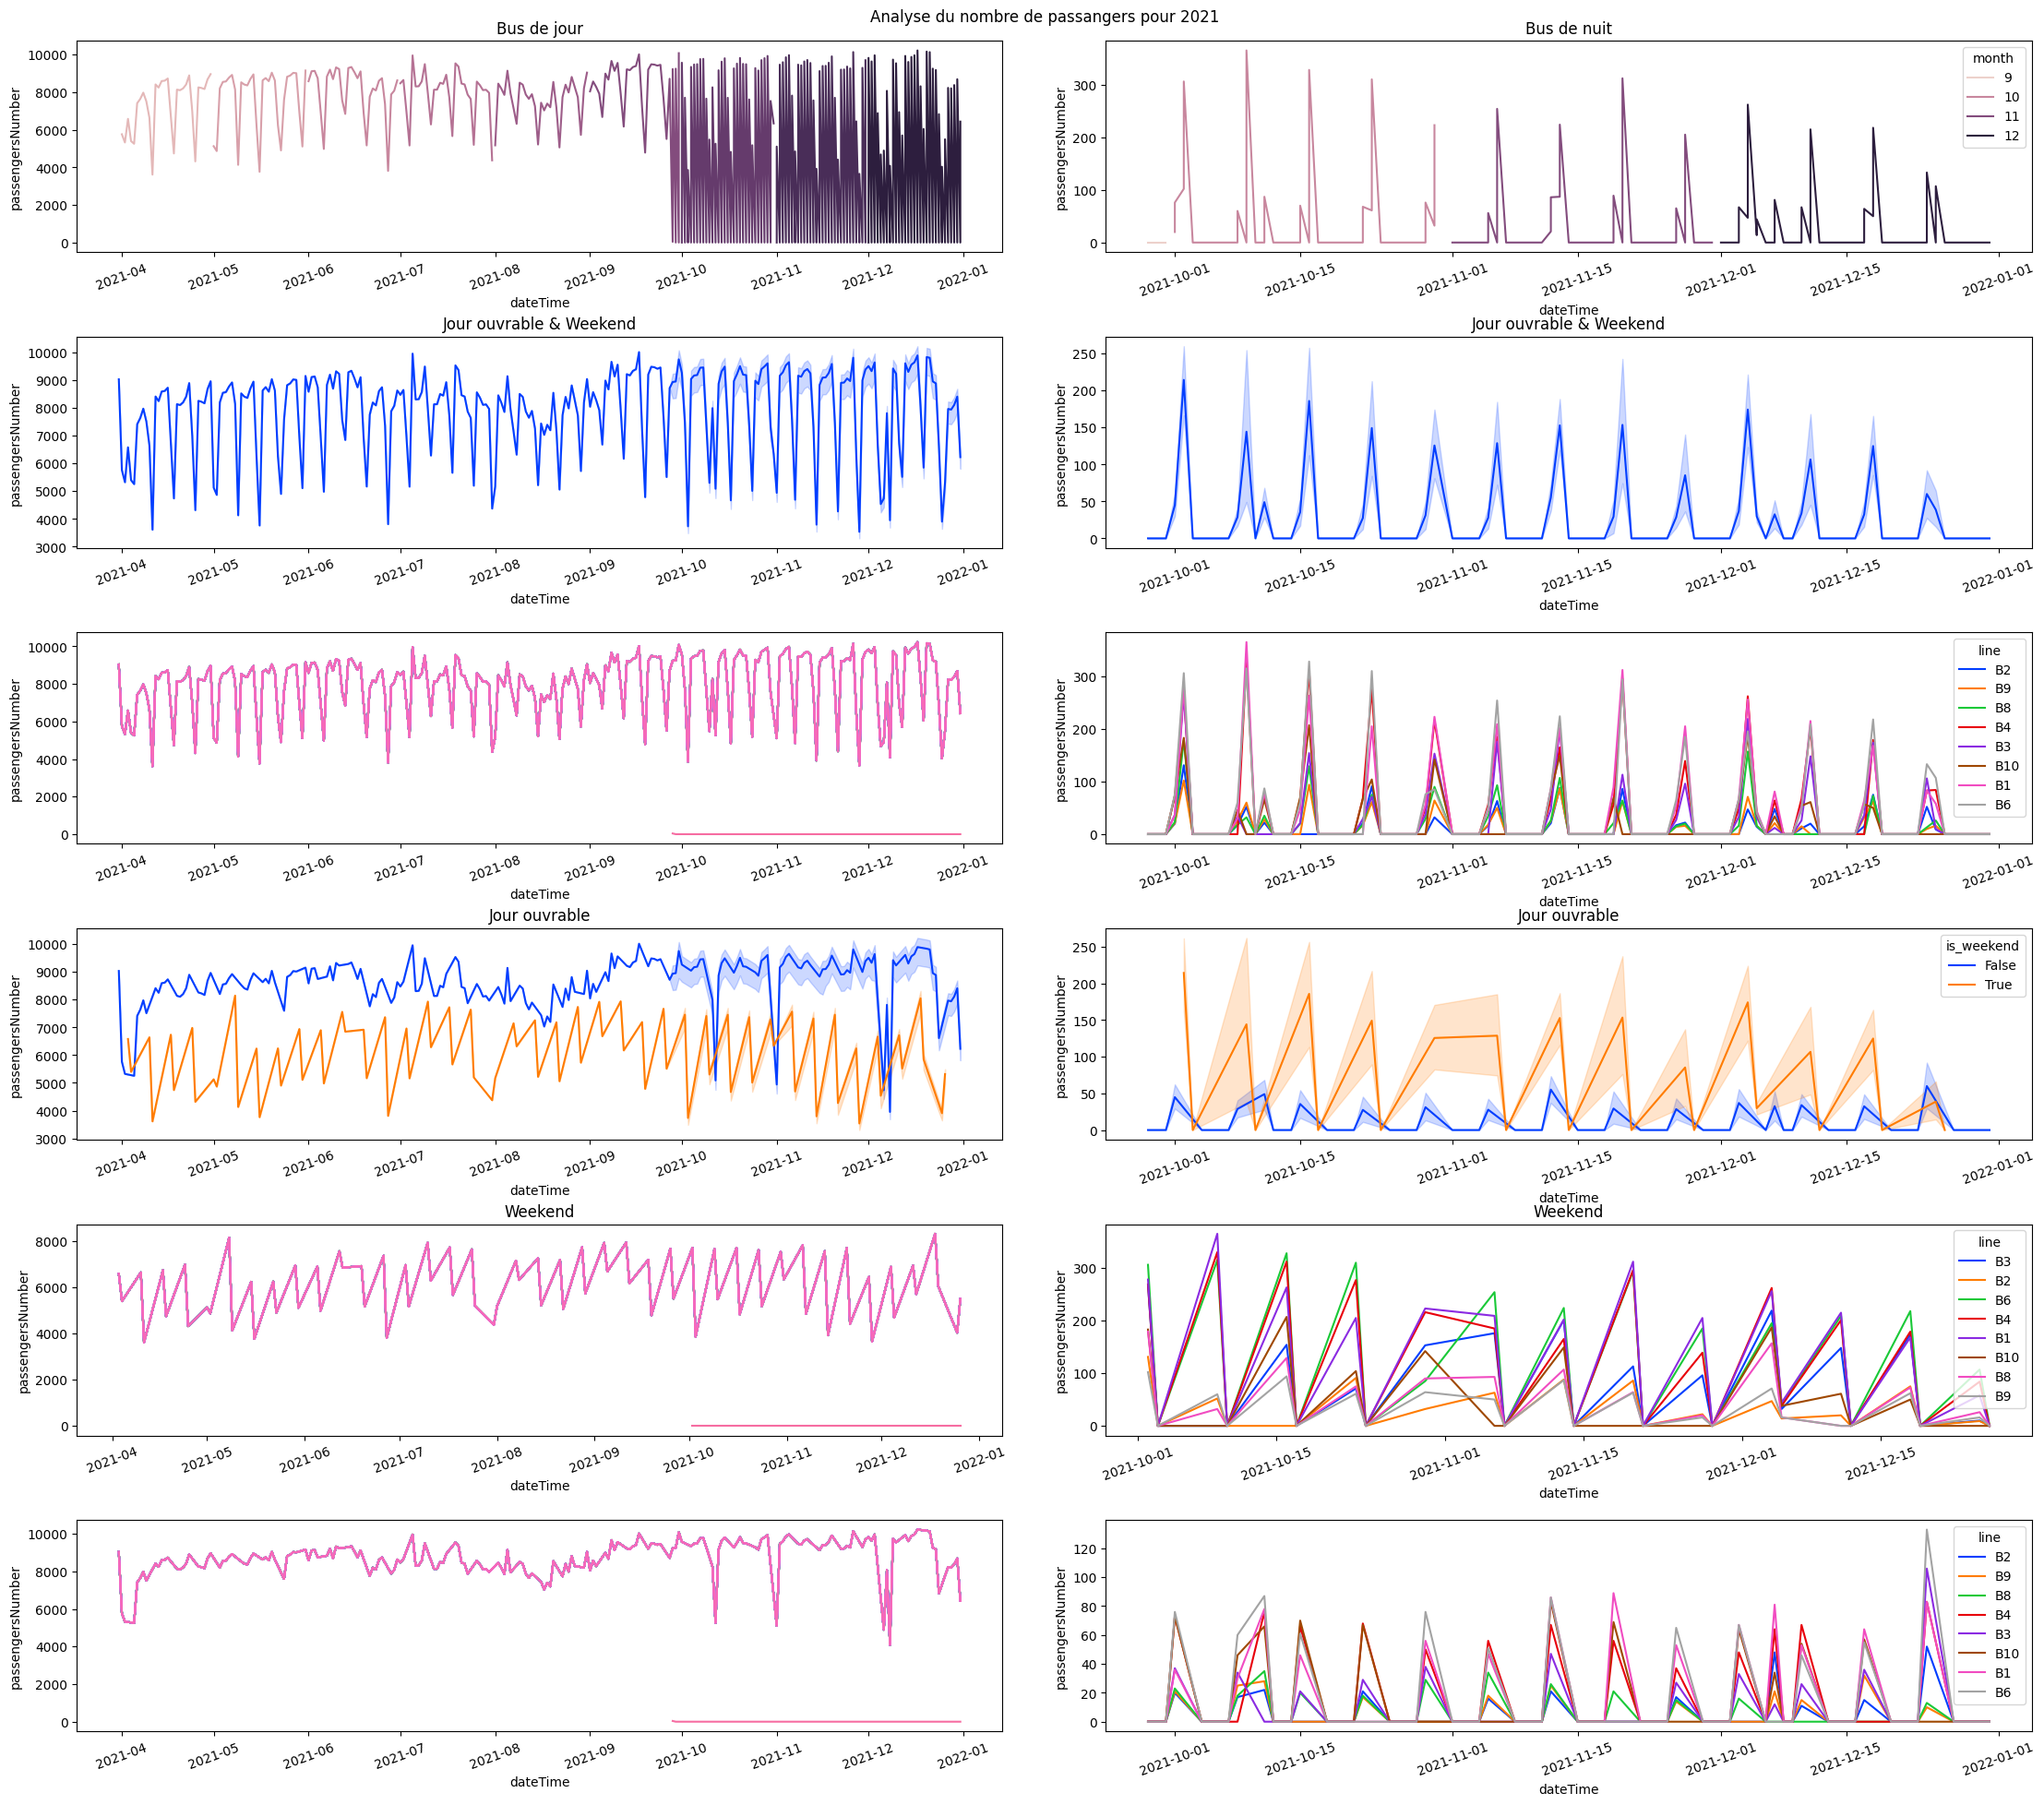

In [1339]:
gh_m4(data[(data.dateTime.dt.year==2021)],title=f"Analyse du nombre de passangers pour 2021",use_date_str=False)

# Analyse 2022

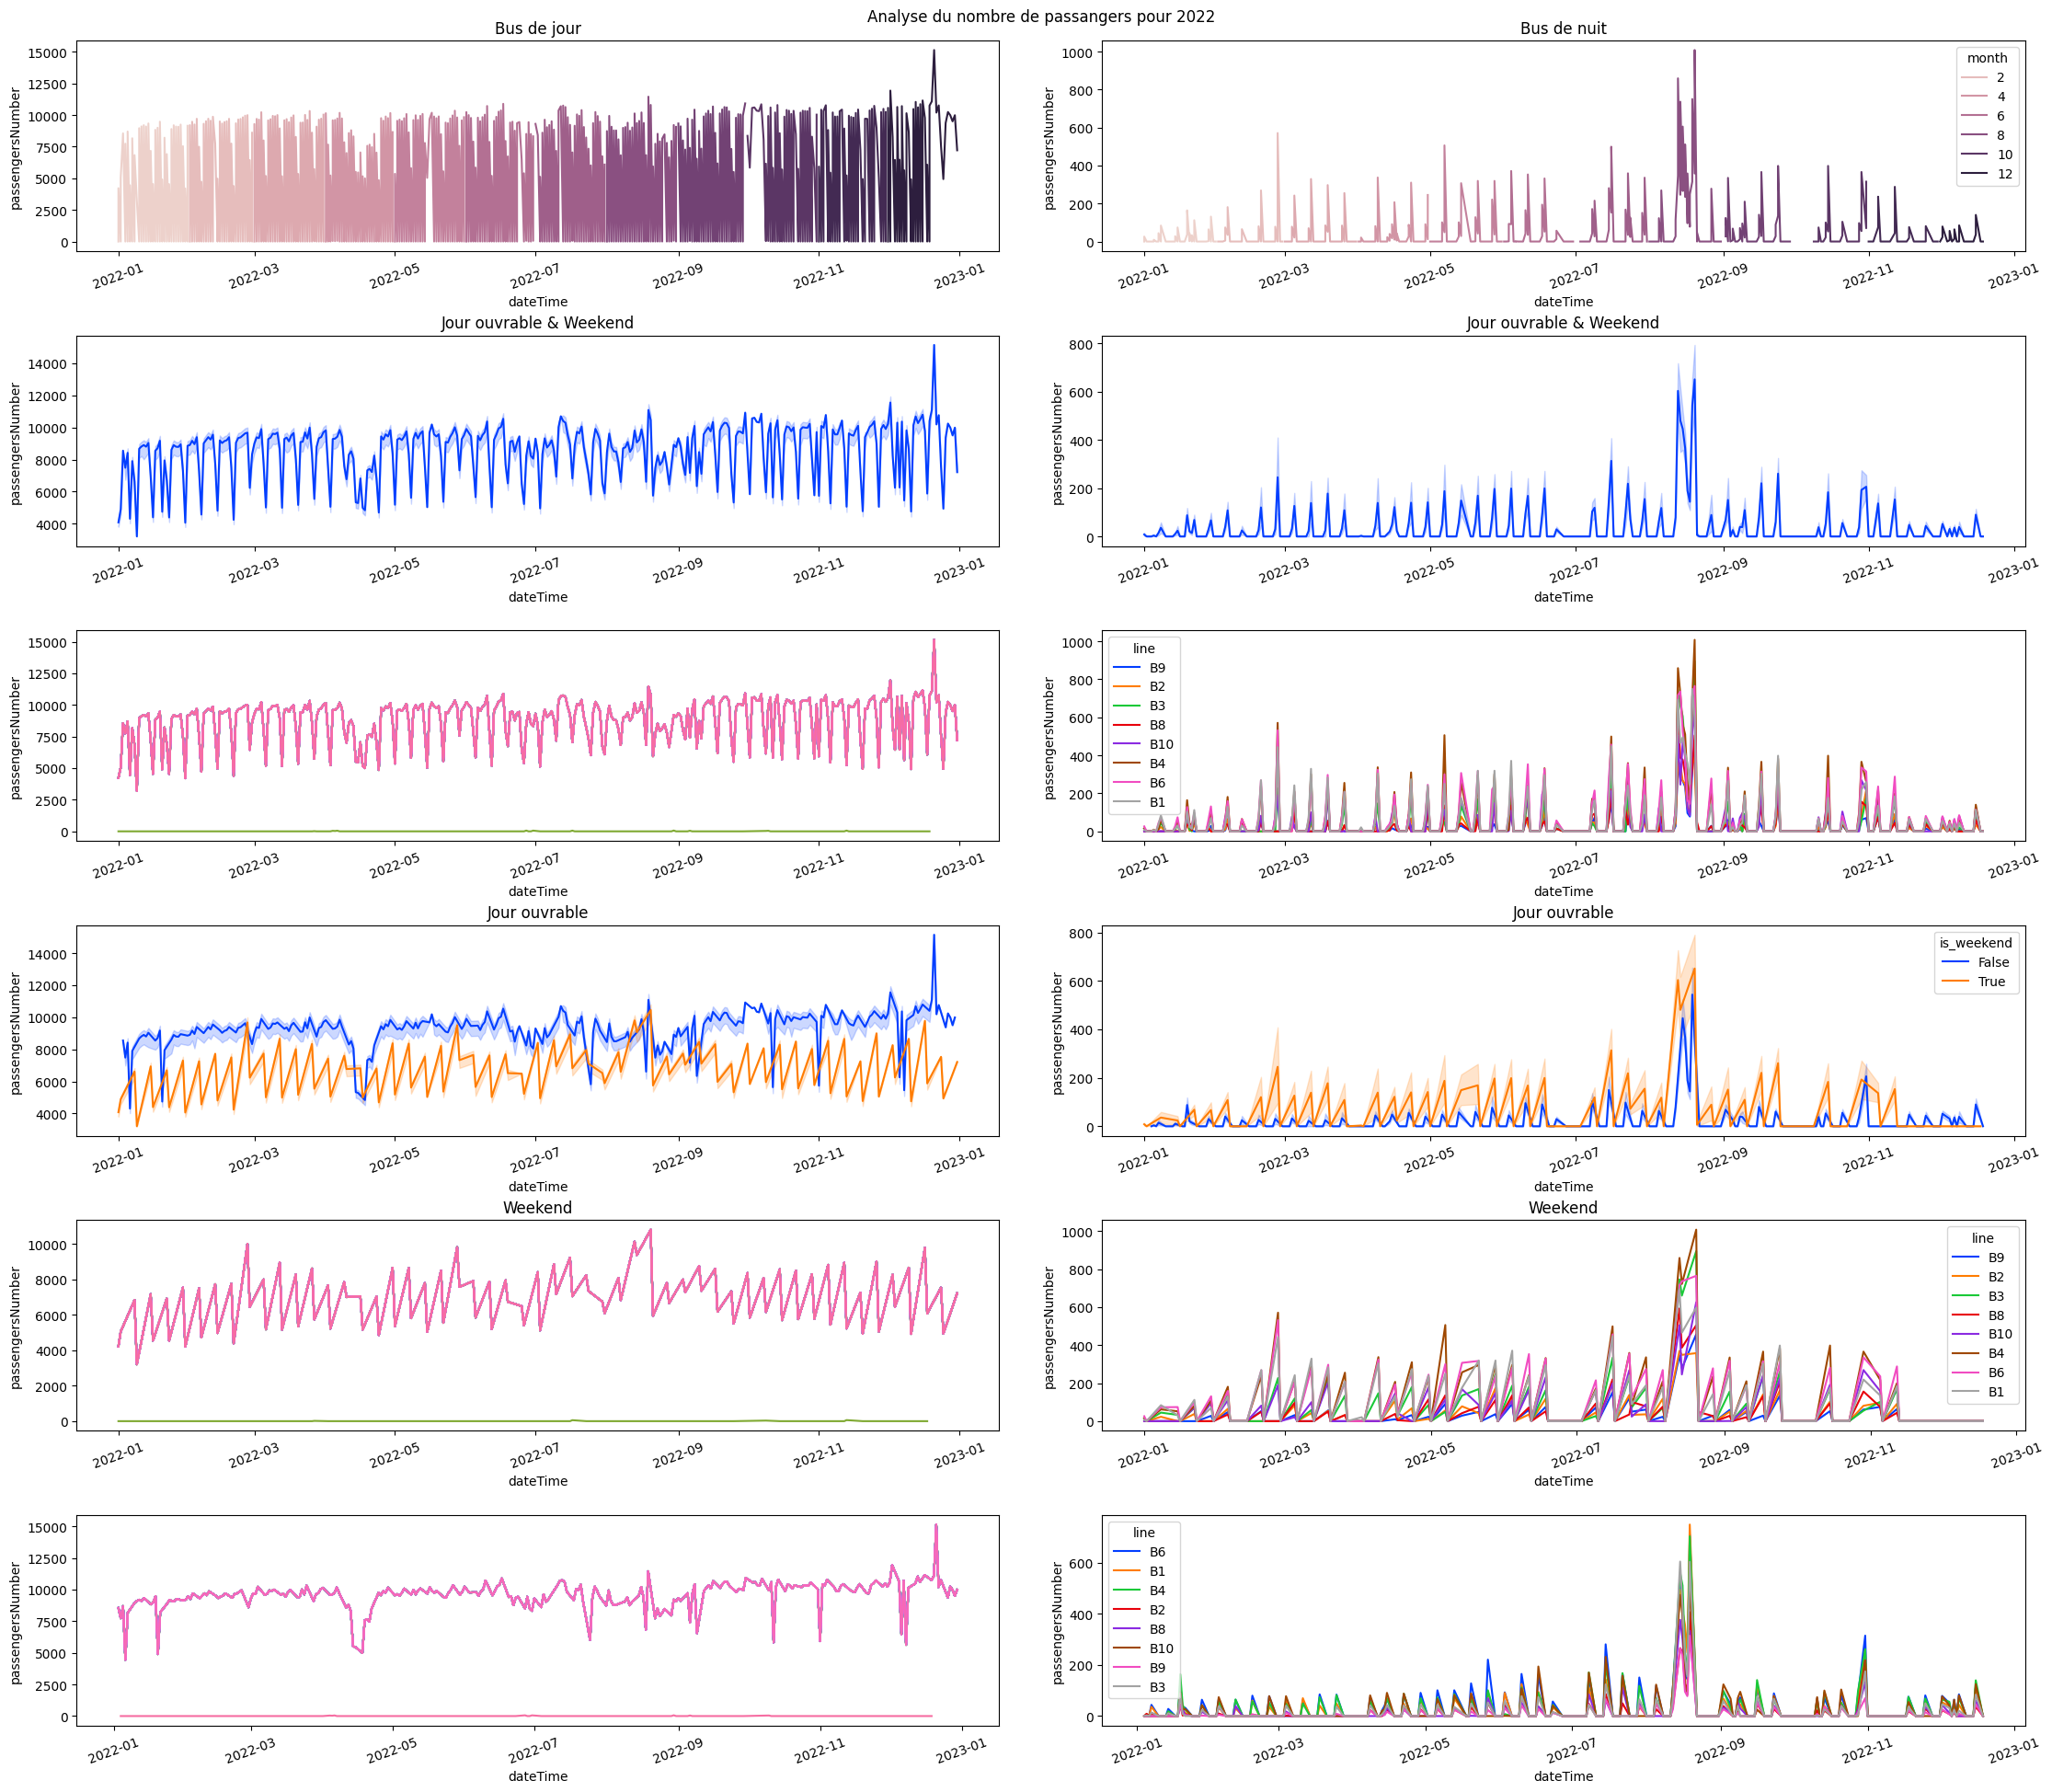

In [1340]:
gh_m4(data[(data.dateTime.dt.year==2022)],title=f"Analyse du nombre de passangers pour 2022",use_date_str=False)

# Analyse 2023

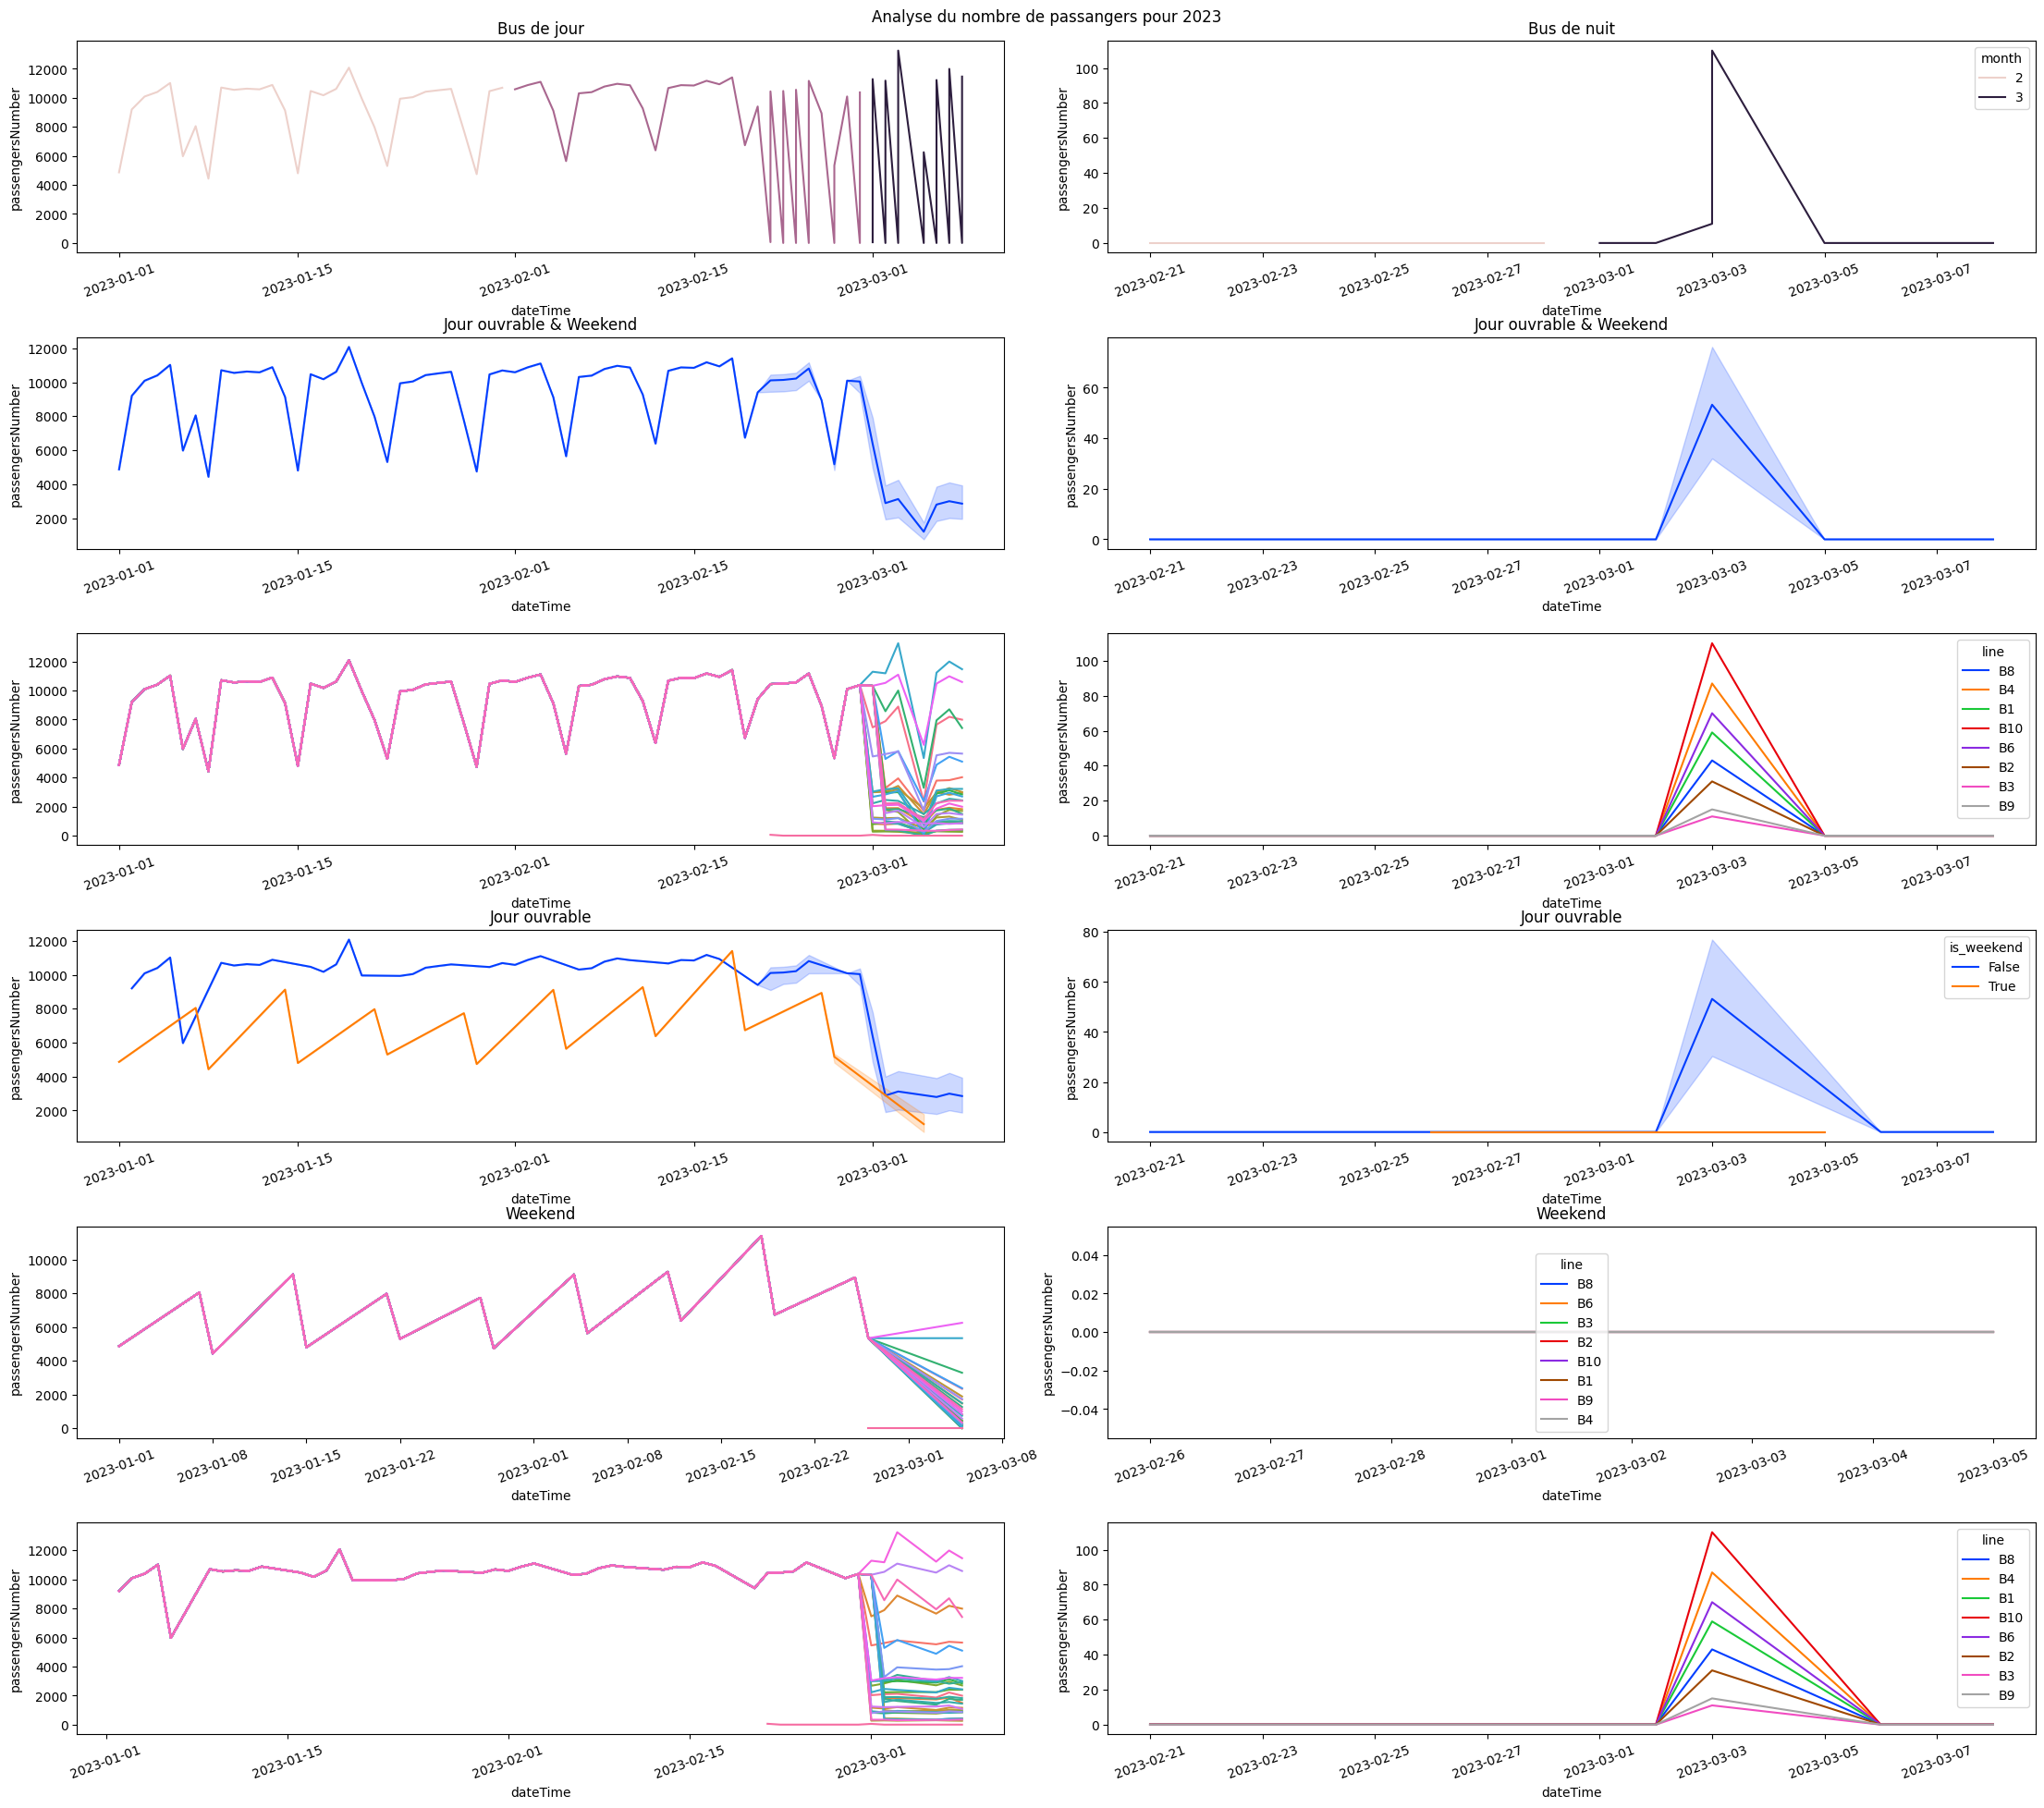

In [1341]:
gh_m4(data[(data.dateTime.dt.year==2023)],title=f"Analyse du nombre de passangers pour 2023",use_date_str=False)